# Multiple Classifiers Ensemble System (MCS)

#### Iury Zanonni de Faria

### Imports

#### General imports

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import statistics as st
import matplotlib.pyplot as plt
import warnings

#### Feature Selection imports

In [2]:
from sklearn.feature_selection import mutual_info_classif
# Info gain - weka

#### Diversity imports

In [3]:
from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

#### Classifiers imports

In [38]:
import xgboost
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression


#### k-mean

In [5]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

### Settings

In [6]:
DATA = ['Date', 'Current Ratio','Quick Ratio','Current Assets', 'Long-term debt to equity ratio', 'Share Holder Equity','Debt to Equity Ratio', 'Percentage of net profit to sale',
'Percentage of operating profit to sale','Percentage of Gross profit to sale','ROA','ROE','EPS','P/E','P/S','Stock book value','Stock Price','ROI','MarketReturn', 'Company']

DATA = ['Unnamed: 0', 'revenue','cost-goods-sold','gross-profit','research-development-expenses','selling-general-administrative-expenses','operating-expenses',
'operating-income','total-non-operating-income-expense','pre-tax-income','total-provision-income-taxes','income-after-taxes','income-from-continuous-operations',
'income-from-discontinued-operations','net-income','ebitda','ebit','basic-shares-outstanding','shares-outstanding','eps-basic-net-earnings-per-share',
'eps-earnings-per-share-diluted','cash-on-hand','receivables-total','inventory','other-current-assets','total-current-assets','net-property-plant-equipment',
'long-term-investments','goodwill-intangible-assets-total','other-long-term-assets','total-long-term-assets','total-assets','total-current-liabilities','long-term-debt',
'other-non-current-liabilities','total-long-term-liabilities','total-liabilities','common-stock-net','retained-earnings-accumulated-deficit','comprehensive-income',
'total-share-holder-equity','total-liabilities-share-holders-equity','net-income-loss','total-depreciation-amortization-cash-flow','other-non-cash-items','total-non-cash-items',
'change-in-accounts-receivable','change-in-inventories','change-in-accounts-payable','change-in-assets-liabilities','total-change-in-assets-liabilities',
'cash-flow-from-operating-activities','net-change-in-property-plant-equipment','net-change-in-intangible-assets','net-acquisitions-divestitures','investing-activities-other',
'cash-flow-from-investing-activities','net-long-term-debt','net-current-debt','debt-issuance-retirement-net-total','net-common-equity-issued-repurchased',
'net-total-equity-issued-repurchased','total-common-preferred-stock-dividends-paid','financial-activities-other','cash-flow-from-financial-activities',
'net-cash-flow','stock-based-compensation','common-stock-dividends-paid','current-ratio','long-term-debt-capital','debt-equity-ratio','gross-margin',
'operating-margin','ebit-margin','pre-tax-profit-margin','net-profit-margin','asset-turnover','inventory-turnover','receiveable-turnover','days-sales-in-receivables',
'roe','return-on-tangible-equity','roa','roi','book-value-per-share','operating-cash-flow-per-share','free-cash-flow-per-share','net-change-in-short-term-investments',
'net-change-in-long-term-investments','net-change-in-investments-total','other-operating-income-expenses','pre-paid-expenses','other-share-holders-equity','other-income',
'ebitda-margin']

REAL_RETURN_CLASS = "RealReturnClass"
REAL_RETURN = "RealReturn"
RISK_CLASS = 'RiskClass'
RISK = "Risk"

HIGH = 'high'
MEDIUM = 'medium'
LOW = 'low'

DATE = 'Unnamed: 0'

N_PERIODS = 2
N_FEATURES = 20

DATASET_PATH = 'new_dataset/process_final_{}.csv'.format(N_PERIODS)

#Remove os warnings do notebook
warnings.filterwarnings('ignore')

### Import dataset

In [7]:
dataset = pd.read_csv(DATASET_PATH)

### Data Frequency

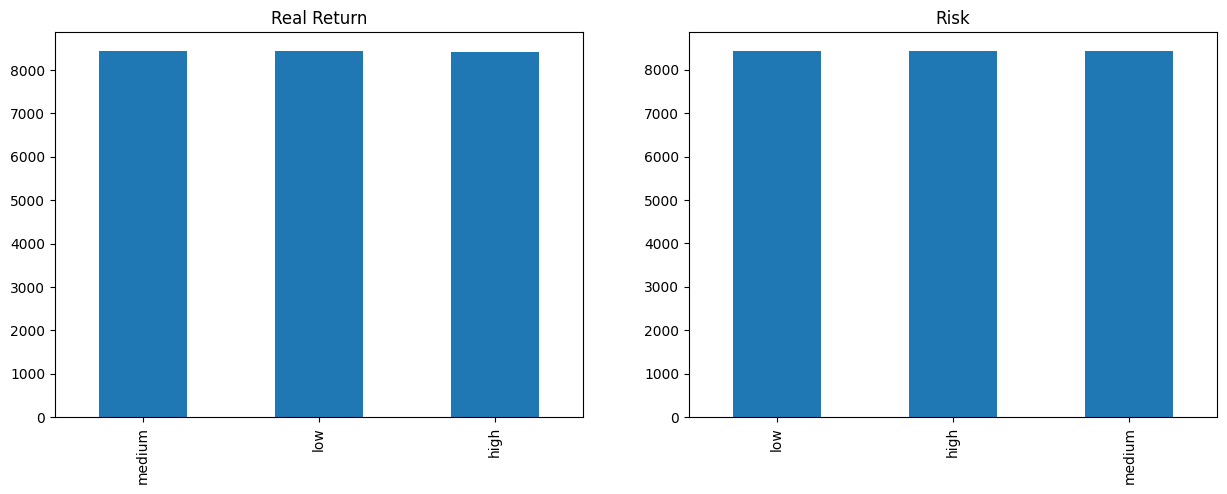

In [8]:
def plotResults(dataset:pd.DataFrame, title_1:str, title_2:str):
  fig, axes = plt.subplots(nrows=1, ncols=2)
  fig.set_figwidth(15)
  fig.set_figheight(5)

  x = dataset[REAL_RETURN_CLASS].value_counts()
  x.plot.bar(ax=axes[0])
  axes[0].set_title(title_1)

  x = dataset[RISK_CLASS].value_counts()
  x.plot.bar(ax=axes[1])
  axes[1].set_title(title_2)

plotResults(dataset, "Real Return", "Risk")

### Feature Selection

In [9]:
dataset = dataset.replace(to_replace=[HIGH], value=2.0)
dataset = dataset.replace(to_replace=[MEDIUM], value=1.0)
dataset = dataset.replace(to_replace=[LOW], value=0.0)

dataset = dataset.replace(to_replace=[np.NaN], value=0.0)

dataset_X = dataset.drop(columns=[REAL_RETURN_CLASS, REAL_RETURN, RISK_CLASS, RISK, DATE])
dataset_y = dataset.drop(columns=DATA)

#### Real Return

In [10]:
rank_real_return = mutual_info_classif(dataset_X, dataset_y[REAL_RETURN_CLASS], discrete_features=True)

result_real_return = {}

for i in range(0, len(dataset_X.columns)):
    result_real_return[dataset_X.columns[i]] = rank_real_return[i]

final_ranking_real_return = sorted(result_real_return.items(), key=lambda x: x[1])
final_ranking_real_return.reverse()
final_ranking_real_return

[('book-value-per-share', 1.0781738725762178),
 ('total-liabilities-share-holders-equity', 1.0730975504432838),
 ('total-assets', 1.0730975504432838),
 ('return-on-tangible-equity', 1.0720236307826683),
 ('pre-tax-profit-margin', 1.0715423436623848),
 ('net-profit-margin', 1.0655457595048283),
 ('total-long-term-assets', 1.063440098960802),
 ('total-liabilities', 1.060025221503162),
 ('roe', 1.037837312201647),
 ('total-long-term-liabilities', 1.0371848786605442),
 ('roi', 1.0332105579822386),
 ('total-share-holder-equity', 1.0330730639322019),
 ('ebit-margin', 1.0308664906950786),
 ('operating-margin', 1.030584461918695),
 ('retained-earnings-accumulated-deficit', 1.0204939670787345),
 ('total-current-assets', 1.007819172959037),
 ('total-current-liabilities', 0.9908536271554558),
 ('roa', 0.9704110154244339),
 ('long-term-debt', 0.9535283875008169),
 ('net-property-plant-equipment', 0.9396579621468436),
 ('days-sales-in-receivables', 0.9325970570255593),
 ('revenue', 0.92858714383506

#### Risk

In [11]:
rank_risk = mutual_info_classif(dataset_X, dataset_y[RISK_CLASS], discrete_features=True)

result_risk = {}

for i in range(0, len(dataset_X.columns)):
    result_risk[dataset_X.columns[i]] = rank_risk[i]

final_ranking_risk = sorted(result_risk.items(), key=lambda x: x[1])
final_ranking_risk.reverse()
final_ranking_risk

[('book-value-per-share', 1.0784866809287685),
 ('total-liabilities-share-holders-equity', 1.0716668597392707),
 ('total-assets', 1.0716668597392707),
 ('pre-tax-profit-margin', 1.0713654930019336),
 ('net-profit-margin', 1.0648272532186995),
 ('return-on-tangible-equity', 1.0641284969009375),
 ('total-long-term-assets', 1.0614202187725474),
 ('total-liabilities', 1.0599517591343064),
 ('total-long-term-liabilities', 1.0361093780620672),
 ('total-share-holder-equity', 1.0352116158920783),
 ('ebit-margin', 1.0318595511234556),
 ('operating-margin', 1.0318226107738098),
 ('retained-earnings-accumulated-deficit', 1.0216322493402616),
 ('roe', 1.0153269192164784),
 ('total-current-assets', 1.006928473411139),
 ('total-current-liabilities', 0.9881403013559005),
 ('roi', 0.971769896256639),
 ('net-property-plant-equipment', 0.9307835159126874),
 ('revenue', 0.926023829434609),
 ('days-sales-in-receivables', 0.9203868010526002),
 ('long-term-debt', 0.9137434746678487),
 ('roa', 0.912712498968

In [12]:
def getColumnsRank(rank: list):
  ranking = []
  for column in rank:
    ranking.append(column[0])
    
  return ranking

In [13]:
features_real_return = getColumnsRank(final_ranking_real_return)[:N_FEATURES]
features_risk = getColumnsRank(final_ranking_risk)[:N_FEATURES]

### SSCA

O cálculo será feito com o número total de features ou somente com as 15 mais bem ranqueadas?

In [14]:

SSCAS = []

features_return = getColumnsRank(final_ranking_real_return)[:N_FEATURES]

#dataset_X = dataset.drop(columns=[REAL_RETURN_CLASS, REAL_RETURN, RISK_CLASS, RISK, "Date", "Company"])
dataset_X = dataset[features_return]
dataset_y = dataset.drop(columns=DATA)

dataset_X

,book-value-per-share,total-liabilities-share-holders-equity,total-assets,return-on-tangible-equity,pre-tax-profit-margin,net-profit-margin,total-long-term-assets,total-liabilities,roe,total-long-term-liabilities,roi,total-share-holder-equity,ebit-margin,operating-margin,retained-earnings-accumulated-deficit,total-current-assets,total-current-liabilities,roa,long-term-debt,net-property-plant-equipment
0,3.6102,336309.0,336309.0,33.4590,27.8041,23.4357,224017.0,278202.0,33.4590,148329.0,12.7232,58107.0,27.8162,27.8162,5289.0,112292.0,129873.0,5.7810,94700.0,40335.0
1,4.1585,350662.0,350662.0,37.1074,30.9823,25.7098,232482.0,283263.0,37.1074,155755.0,14.6496,67399.0,30.8179,30.8179,12712.0,118180.0,127508.0,7.1322,103323.0,39304.0
2,4.4020,381191.0,381191.0,48.1427,33.2736,27.9398,228037.0,309259.0,48.1427,161685.0,19.3939,71932.0,33.4729,33.4729,14435.0,153154.0,147574.0,9.0847,106629.0,39245.0
3,3.8407,351002.0,351002.0,32.5741,27.8887,24.6533,216166.0,287912.0,32.5741,162431.0,11.9347,63090.0,28.5341,28.5341,5562.0,134836.0,125481.0,5.8550,109106.0,39440.0
4,3.8824,329840.0,329840.0,33.8270,29.9249,26.7014,215417.0,265560.0,33.8270,157806.0,12.7882,64280.0,29.6265,29.6265,9233.0,114423.0,107754.0,6.5923,105752.0,38615.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25300,21.9349,15643.0,15643.0,-14.4380,-64.6876,-49.8006,11000.0,2947.0,-8.8672,776.0,-8.8532,12696.0,-0.8861,-0.8861,0.0,4643.0,2171.0,-7.1853,0.0,2992.0
25301,-14.6628,1049.8,1049.8,-7.1510,25.2834,21.4359,469.2,1897.4,-7.3620,1668.9,7.9541,-847.6,33.3562,33.3562,-556.0,580.6,228.5,5.9440,1632.1,375.7
25302,-16.7393,833.5,833.5,-7.9425,34.2077,28.9982,407.0,1801.0,-8.2274,1632.1,12.5711,-967.5,36.0291,36.0291,0.0,426.5,168.9,9.5501,1600.7,355.7
25303,0.0000,739.9,739.9,19.1251,40.3042,34.1514,481.6,189.4,17.9473,30.3,17.9473,550.5,40.3042,40.3042,0.0,258.3,159.1,13.3532,0.0,436.5


In [15]:
for cluster in range(2, 7):
  clusterer = KMeans(n_clusters=cluster, random_state=10)

  cluster_labels = clusterer.fit_predict(dataset_X)

  silhouette_values = silhouette_samples(dataset_X, cluster_labels)
  #silhouette_avg = silhouette_score(dataset_X, cluster_labels)

  sum_count = 0
  count_2 = 0

  #Primeiro somatorio
  for k in range(cluster):
    count = 0
    n_j = 0

    #Segundo somatorio
    for j in range(len(cluster_labels)):
      if cluster_labels[j] == k:
        n_j += 1
        count += silhouette_values[j]

    count_2 = (count/n_j)
    sum_count += count_2

  SSCA = (sum_count/cluster)
  SSCAS.append((cluster, round(SSCA, 2)))

SSCAS

[(2, 0.82), (3, 0.64), (4, 0.53), (5, 0.48), (6, 0.44)]

### Divisão do dataset

In [16]:
columns_dataset = DATA
columns_dataset.append(REAL_RETURN)
columns_dataset.append(RISK)
columns_dataset.append(REAL_RETURN_CLASS)
columns_dataset.append(RISK_CLASS)

df_train = None
df_test = None

df_train = pd.DataFrame(columns=columns_dataset)
df_test = pd.DataFrame(columns=columns_dataset)

In [17]:
TRAINING_START_DATE =  dt.datetime.strptime('2009-03-31', "%Y-%m-%d")
TRAINING_END_DATE =  dt.datetime.strptime('2018-03-31', "%Y-%m-%d")

TEST_START_DATE =  dt.datetime.strptime('2018-06-30', "%Y-%m-%d")
TEST_END_DATE =  dt.datetime.strptime('2022-03-31', "%Y-%m-%d")

dataset_sort = dataset.sort_values(by=DATE)
count_train = 0
count_test = 0

for index, row in dataset_sort.iterrows():
  date = dt.datetime.strptime(row[DATE], "%Y-%m-%d")
  if date.year < TEST_START_DATE.year:
    df_train = df_train.append(row)
    count_train +=1
  elif date.year == TEST_START_DATE.year and date.month < TEST_START_DATE.month:
    df_train = df_train.append(row)
    count_train +=1
  else:
    df_test = df_test.append(row)
    count_test += 1

print(count_train)
print(count_test)

df_train = df_train.drop(columns=[REAL_RETURN, RISK, DATE])
df_test = df_test.drop(columns=[REAL_RETURN, RISK, DATE])

# plotResults(df_train, "Real Return", "Risk")

# plotResults(df_test, "Real Return", "Risk")

17006
8299


##### Real Return

In [18]:
X_real_return_train = df_train[features_real_return]
y_real_return_train = df_train[REAL_RETURN_CLASS]

In [19]:
X_real_return_test = df_test[features_real_return]
y_real_return_test = df_test[REAL_RETURN_CLASS]

##### Risk

In [20]:
X_risk_train = df_train[features_risk]
y_risk_train = df_train[RISK_CLASS]

In [21]:
X_risk_test = df_test[features_risk]
y_risk_test = df_test[RISK_CLASS]

### Classificadores Únicos

In [22]:
classifiers_real_return = {}
classifiers_risk = {}

#### Random Forest

##### Real Return

In [23]:
RANDOM_FOREST = 'RANDOM_FOREST'

randon_forest_return = RandomForestClassifier(max_depth=50, random_state=42)

randon_forest_return.fit(X_real_return_train, y_real_return_train)

randon_forest_return.score(X_real_return_test, y_real_return_test)

0.8344378840824196

##### Risk

In [24]:
randon_forest_risk = RandomForestClassifier(max_depth=50, random_state=42)
classifiers_risk[RANDOM_FOREST] = randon_forest_return

randon_forest_risk.fit(X_risk_train, y_risk_train)

randon_forest_risk.score(X_risk_test, y_risk_test)

0.5024701771297747

#### SVM

##### Real Return

In [25]:
SVM = 'SVM'

svm_real_return = SVC(kernel='rbf', C=100)
classifiers_real_return[SVM] = svm_real_return

svm_real_return.fit(X_real_return_train, y_real_return_train)

svm_real_return.score(X_real_return_test, y_real_return_test)

0.586094710206049

##### Risk

In [26]:
svm_risk = SVC(kernel='rbf', C=100)
classifiers_risk[SVM] = svm_risk

svm_risk.fit(X_risk_train, y_risk_train)

svm_risk.score(X_risk_test, y_risk_test)

0.42571394143872754

#### Decision Tree

##### Real Return

In [27]:
DECISION_TREE = 'DECISION_TREE'

decision_tree_real_return = DecisionTreeClassifier()
classifiers_real_return[DECISION_TREE] = decision_tree_real_return

decision_tree_real_return.fit(X_real_return_train, y_real_return_train)

decision_tree_real_return.score(X_real_return_test, y_real_return_test)

0.735389806000723

##### Risk

In [28]:
decision_tree_risk = DecisionTreeClassifier()
classifiers_risk[DECISION_TREE] = decision_tree_risk

decision_tree_risk.fit(X_risk_train, y_risk_train)

decision_tree_risk.score(X_risk_test, y_risk_test)

0.4263164236655019

#### Gaussian Naive Bayes

##### Real Return

In [47]:
NAIVE_BAYES = 'NAIVE_BAYES'

nb_real_return = BernoulliNB()
classifiers_real_return[NAIVE_BAYES] = nb_real_return

nb_real_return.fit(X_real_return_train, y_real_return_train)

nb_real_return.score(X_real_return_test, y_real_return_test)

0.43740209663814916

##### Risk

In [30]:
nb_risk = BernoulliNB()
classifiers_risk[NAIVE_BAYES] = nb_risk

nb_risk.fit(X_risk_train, y_risk_train)

nb_risk.score(X_risk_test, y_risk_test)

0.4108928786600795

#### Rede Neural

Como determinar o número de camadas e neurônios?

##### Real Return

In [31]:
NEURAL_NETWORK = 'NEURAL_NETWORK'
neural_return = MLPClassifier(activation='logistic', solver='lbfgs', max_iter=300, hidden_layer_sizes=(100,))
classifiers_real_return[NEURAL_NETWORK] = neural_return

neural_return.fit(X_real_return_train, y_real_return_train)

neural_return.score(X_real_return_test, y_real_return_test)



0.525846487528618

##### Risk

In [32]:
neural_risk = MLPClassifier(activation='logistic', solver='lbfgs', max_iter=300, hidden_layer_sizes=(100,))
classifiers_risk[NEURAL_NETWORK] = neural_risk

neural_risk.fit(X_risk_train, y_risk_train)

neural_risk.score(X_risk_test, y_risk_test)

0.4220990480780817

#### Regressão Logística

##### Real Return

In [33]:
LOGISTIC_REGRESSION ='LOGISTIC_REGRESSION'

rl_return = LogisticRegression(solver='newton-cg', penalty='l2')
classifiers_real_return[LOGISTIC_REGRESSION] = rl_return

rl_return.fit(X_real_return_train, y_real_return_train)

rl_return.score(X_real_return_test, y_real_return_test)

0.7164718640800096

##### Risk

In [34]:
rl_risk = LogisticRegression(solver='newton-cg', penalty='l2')
classifiers_risk[LOGISTIC_REGRESSION] = rl_risk

rl_risk.fit(X_risk_train, y_risk_train)

rl_risk.score(X_risk_test, y_risk_test)

0.43812507531027833

### Cross-validation

In [35]:
CV = 10
result_cv_real_return = {}
result_cv_risk = {}

X_dataset_real_return = dataset[features_real_return]
y_dataset_real_return = dataset[REAL_RETURN_CLASS]

X_dataset_risk = dataset[features_risk]
y_dataset_risk = dataset[RISK_CLASS]

##### Real Return

In [36]:
# cv_result = cross_val_score(classifiers_real_return[RANDOM_FOREST], X_dataset_real_return, y_dataset_real_return, cv=CV)
# result_cv_real_return[RANDOM_FOREST] = cv_result.mean()

# cv_result = cross_val_score(classifiers_real_return[SVM], X_dataset_real_return, y_dataset_real_return, cv=CV)
# result_cv_real_return[SVM] = cv_result.mean()

# cv_result = cross_val_score(classifiers_real_return[DECISION_TREE], X_dataset_real_return, y_dataset_real_return, cv=CV)
# result_cv_real_return[DECISION_TREE] = cv_result.mean()

# cv_result = cross_val_score(classifiers_real_return[NAIVE_BAYES], X_dataset_real_return, y_dataset_real_return, cv=CV)
# result_cv_real_return[NAIVE_BAYES] = cv_result.mean()

# cv_result = cross_val_score(classifiers_real_return[NEURAL_NETWORK], X_dataset_real_return, y_dataset_real_return, cv=CV)
# result_cv_real_return[NEURAL_NETWORK] = cv_result.mean()

# cv_result = cross_val_score(classifiers_real_return[LOGISTIC_REGRESSION], X_dataset_real_return, y_dataset_real_return, cv=CV)
# result_cv_real_return[LOGISTIC_REGRESSION] = cv_result.mean()

# result_cv_real_return

##### Risk

In [37]:
# cv_result = cross_val_score(classifiers_risk[RANDOM_FOREST], X_dataset_risk, y_dataset_risk, cv=CV)
# result_cv_risk[RANDOM_FOREST] = cv_result.mean()

# cv_result = cross_val_score(classifiers_risk[SVM], X_dataset_risk, y_dataset_risk, cv=CV)
# result_cv_risk[SVM] = cv_result.mean()

# cv_result = cross_val_score(classifiers_risk[DECISION_TREE], X_dataset_risk, y_dataset_risk, cv=CV)
# result_cv_risk[DECISION_TREE] = cv_result.mean()

# cv_result = cross_val_score(classifiers_risk[NAIVE_BAYES], X_dataset_risk, y_dataset_risk, cv=CV)
# result_cv_risk[NAIVE_BAYES] = cv_result.mean()

# cv_result = cross_val_score(classifiers_risk[NEURAL_NETWORK], X_dataset_risk, y_dataset_risk, cv=CV)
# result_cv_risk[NEURAL_NETWORK] = cv_result.mean()

# cv_result = cross_val_score(classifiers_risk[LOGISTIC_REGRESSION], X_dataset_risk, y_dataset_risk, cv=CV)
# result_cv_risk[LOGISTIC_REGRESSION] = cv_result.mean()

# result_cv_risk